In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import math
from matplotlib.ticker import MaxNLocator
from scipy import stats

In [2]:
#downloading all the files
asr=pd.read_csv('data1_age_sex_race.csv')
asr['Sex']=asr['SexAge_Race'].str[0]

trt=pd.read_csv('data3a_weight_trt.csv')

ctl=pd.read_csv('data3b_weight_con.csv')

In [3]:
#split treated group and control group, get weight difference between post and pre

treated=trt.groupby('Id', as_index=False).agg({"PRE_WEIGHT": "mean","POST_WEIGHT":'mean'})
treated['WEIGHT_DIFFERENCE']=treated['POST_WEIGHT']-treated['PRE_WEIGHT']
treated = treated.join(asr.set_index('subject_ID'), on='Id')

control=ctl.groupby('obs_ID', as_index=False).agg({"PRE_WEIGHT": "mean","POST_WEIGHT":'mean'})
control['WEIGHT_DIFFERENCE']=control['POST_WEIGHT']-control['PRE_WEIGHT']
control = control.join(asr.set_index('subject_ID'), on='obs_ID')

In [4]:
#split dataframe for each gender

treated_men = treated.loc[(treated['Sex'] == 'M')]
treated_women = treated.loc[(treated['Sex'] == 'F')]

control_men = control.loc[(control['Sex'] == 'M')]
control_women = control.loc[(control['Sex'] == 'F')]

In [5]:
#mainly used to make legend label nice
treated_men['Men Treated']=treated_men['WEIGHT_DIFFERENCE']
control_men['Men Control']=control_men['WEIGHT_DIFFERENCE']
treated_women['Women Treated']=treated_women['WEIGHT_DIFFERENCE']
control_women['Women Control']=control_women['WEIGHT_DIFFERENCE']

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

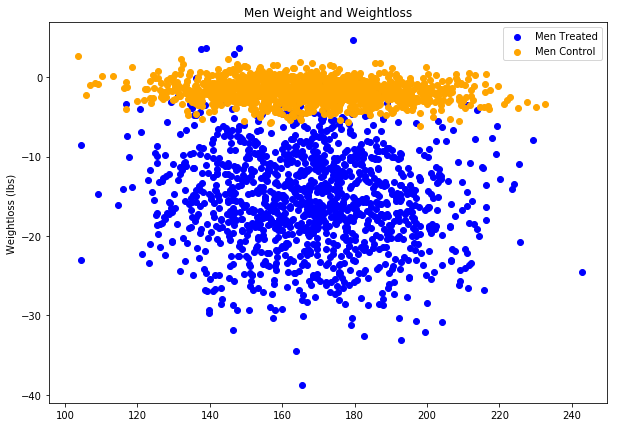

In [6]:
#compare men treat and control
plt.figure(figsize = (10,7))
plt.scatter(treated_men['PRE_WEIGHT'], treated_men['Men Treated'], color = 'Blue')
plt.scatter(control_men['PRE_WEIGHT'], control_men['Men Control'], color = 'Orange')
plt.ylabel('Weightloss (lbs)')
plt.title('Men Weight and Weightloss')
plt.legend()

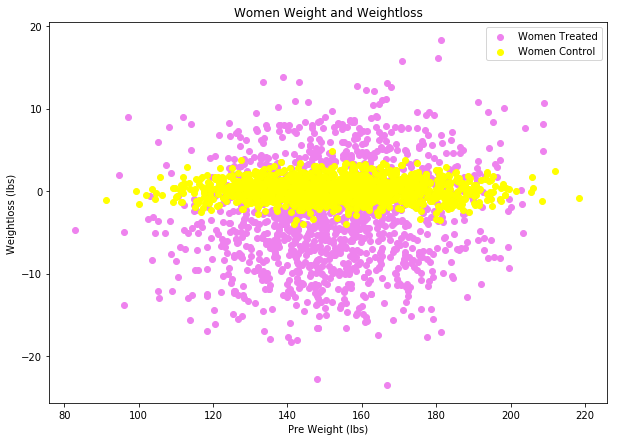

In [7]:
#compare women treat and control
plt.figure(figsize = (10,7))
plt.scatter(treated_women['PRE_WEIGHT'], treated_women['Women Treated'], color = 'violet')
plt.scatter(control_women['PRE_WEIGHT'], control_women['Women Control'], color = 'yellow')
plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Women Weight and Weightloss')
plt.legend()

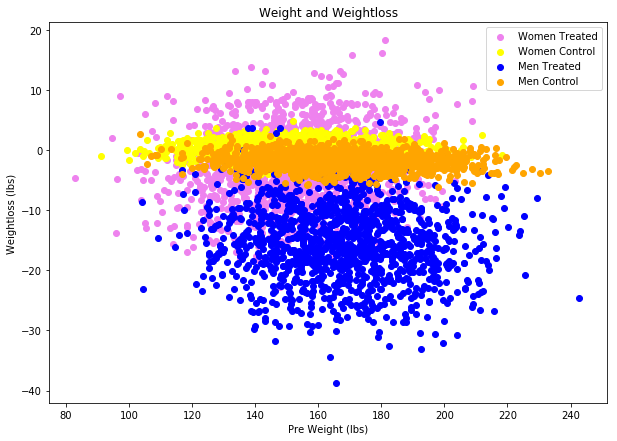

In [8]:
#compare genders, control, and treated
plt.figure(figsize = (10,7))
plt.scatter(treated_women['PRE_WEIGHT'], treated_women['Women Treated'], color = 'violet')
plt.scatter(control_women['PRE_WEIGHT'], control_women['Women Control'], color = 'yellow')
plt.scatter(treated_men['PRE_WEIGHT'], treated_men['Men Treated'], color = 'Blue')
plt.scatter(control_men['PRE_WEIGHT'], control_men['Men Control'], color = 'Orange')

plt.xlabel('Pre Weight (lbs)')
plt.ylabel('Weightloss (lbs)')
plt.title('Weight and Weightloss')
plt.legend()

In [9]:
#getting all teh stats
cm = control_men['WEIGHT_DIFFERENCE']
tm = treated_men['WEIGHT_DIFFERENCE']
cw = control_women['WEIGHT_DIFFERENCE']
tw = treated_women['WEIGHT_DIFFERENCE']
cm_mean = np.mean(cm)
tm_mean = np.mean(tm)
print("control men mean weight difference:",cm_mean)
print("treated men mean weight difference:",tm_mean)
cm_std = np.std(cm)
tm_std = np.std(tm)
print("control men weight difference std:",cm_std)
print("treated men weight difference std:",tm_std)
ttest,pval_men = stats.ttest_ind(cm,tm)
ttest,pval_women = stats.ttest_ind(cw,tw)
print("men p-value",pval_men)
print("women p-value",pval_women)

control men mean weight difference: -1.8001809876543213
treated men mean weight difference: -15.525255622457262
control men weight difference std: 1.3654996454503199
treated men weight difference std: 6.255775110081425
men p-value 0.0
women p-value 1.743566545891855e-56


In [10]:
#getting p-value for men group
stats.ttest_ind(cm, tm, axis=0, equal_var=False)

Ttest_indResult(statistic=75.09512769622559, pvalue=0.0)

In [11]:
#getting p-value for women group
stats.ttest_ind(cw, tw, axis=0, equal_var=False)

Ttest_indResult(statistic=16.153432840685237, pvalue=7.000882113458854e-54)